# Methane Emission Analysis

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('methane_hist_emissions.csv')

In [3]:
df.head()

,Country,Sector,Gas,Unit,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,China,Total including LUCF,CH4,MTCO2e,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,...,826.57,814.80,792.55,824.63,798.90,774.10,758.01,752.10,743.51,730.78
1,China,Total excluding LUCF,CH4,MTCO2e,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,...,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66,743.07,730.34
2,Russia,Total including LUCF,CH4,MTCO2e,853.00,852.12,856.00,837.01,833.59,827.06,...,604.57,606.50,614.99,634.53,643.52,670.71,728.51,784.68,867.35,933.79
3,Russia,Total excluding LUCF,CH4,MTCO2e,849.57,850.17,852.55,835.56,830.22,825.64,...,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89,863.52,929.97
4,China,Energy,CH4,MTCO2e,739.58,741.73,743.88,746.03,723.02,700.01,...,303.13,289.36,275.59,261.82,248.05,234.28,229.86,225.44,221.02,216.60


# Understanding the data

In [4]:
df.shape

(1738, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  1738 non-null   object 
 1   Sector   1738 non-null   object 
 2   Gas      1738 non-null   object 
 3   Unit     1738 non-null   object 
 4   2018     1738 non-null   float64
 5   2017     1738 non-null   float64
 6   2016     1738 non-null   float64
 7   2015     1738 non-null   float64
 8   2014     1738 non-null   float64
 9   2013     1738 non-null   float64
 10  2012     1738 non-null   float64
 11  2011     1738 non-null   float64
 12  2010     1738 non-null   float64
 13  2009     1738 non-null   float64
 14  2008     1738 non-null   float64
 15  2007     1738 non-null   float64
 16  2006     1738 non-null   float64
 17  2005     1738 non-null   float64
 18  2004     1738 non-null   float64
 19  2003     1738 non-null   float64
 20  2002     1738 non-null   float64
 21  2001     1738 

In [6]:
df.isnull().sum()

Country    0
Sector     0
Gas        0
Unit       0
2018       0
2017       0
2016       0
2015       0
2014       0
2013       0
2012       0
2011       0
2010       0
2009       0
2008       0
2007       0
2006       0
2005       0
2004       0
2003       0
2002       0
2001       0
2000       0
1999       0
1998       0
1997       0
1996       0
1995       0
1994       0
1993       0
1992       0
1991       0
1990       9
dtype: int64

In [7]:
df[df['1990'].isnull() == True]

,Country,Sector,Gas,Unit,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
1190,Micronesia,Total excluding LUCF,CH4,MTCO2e,0.06,0.06,0.06,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.01,0.00,0.00,0.00,NaN
1214,Micronesia,Agriculture,CH4,MTCO2e,0.05,0.05,0.05,0.05,0.04,0.04,...,0.04,0.04,0.04,0.04,0.04,0.00,0.00,0.00,0.00,NaN
1251,Marshall Islands,Total excluding LUCF,CH4,MTCO2e,0.03,0.03,0.03,0.03,0.03,0.03,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,NaN
1291,Palau,Total excluding LUCF,CH4,MTCO2e,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,NaN
1460,Micronesia,Land-Use Change and Forestry,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
1577,Marshall Islands,Agriculture,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
1578,Marshall Islands,Land-Use Change and Forestry,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
1637,Palau,Agriculture,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
1638,Palau,Land-Use Change and Forestry,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN


In [8]:
df.describe()

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
count,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,...,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1729.000000
mean,17.198343,17.077722,16.977998,17.099344,16.937865,16.647883,16.630305,16.476300,16.253648,16.130518,...,14.574310,14.616323,14.857405,14.484856,14.477560,14.478504,14.590150,14.666772,14.859804,15.046148
std,77.352468,77.146862,77.085701,77.089803,75.982100,74.644407,73.947479,72.672739,71.366427,69.792069,...,61.237418,61.376516,62.886265,61.979857,62.001017,62.227753,63.091829,64.577578,66.502543,68.231600
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.010000,0.010000,...,0.020000,0.020000,0.020000,0.020000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
50%,0.820000,0.820000,0.830000,0.830000,0.845000,0.830000,0.835000,0.840000,0.840000,0.785000,...,0.750000,0.745000,0.720000,0.720000,0.650000,0.635000,0.660000,0.655000,0.670000,0.630000
75%,7.110000,7.055000,7.090000,7.137500,7.140000,7.247500,7.250000,7.410000,7.072500,6.692500,...,6.225000,6.052500,6.007500,5.960000,5.940000,5.957500,5.992500,5.877500,5.880000,5.960000
max,1238.950000,1239.280000,1242.430000,1237.790000,1206.510000,1178.210000,1151.280000,1106.410000,1064.200000,1019.280000,...,826.570000,814.800000,792.550000,824.630000,798.900000,774.100000,758.010000,784.680000,867.350000,933.790000


In [9]:
df.duplicated().sum()

0

#### Conclusion:
There are no null values except for the year 1990 and no duplicated values in the dataset.

# Data Preparation

In [17]:
df = df.sort_values('Country').reset_index(drop=True)

In [18]:
df.head(10)

,Country,Sector,Gas,Unit,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Afghanistan,Fugitive Emissions,CH4,MTCO2e,2.22,2.21,2.19,2.18,1.98,1.78,...,0.09,0.09,0.09,0.09,0.08,0.12,0.16,0.20,0.24,0.28
1,Afghanistan,Energy,CH4,MTCO2e,67.91,66.21,64.51,62.82,53.45,44.09,...,1.18,1.23,1.29,1.34,1.40,1.62,1.84,2.06,2.29,2.51
2,Afghanistan,Total including LUCF,CH4,MTCO2e,81.51,79.61,78.15,76.59,67.77,58.13,...,11.87,11.10,10.60,9.93,9.14,8.96,8.89,8.99,9.07,8.97
3,Afghanistan,Waste,CH4,MTCO2e,3.15,3.08,3.00,2.93,2.84,2.76,...,1.71,1.65,1.60,1.55,1.49,1.41,1.33,1.25,1.17,1.09
4,Afghanistan,Total excluding LUCF,CH4,MTCO2e,81.51,79.61,78.15,76.59,67.77,58.13,...,11.87,11.10,10.60,9.93,9.14,8.96,8.89,8.99,9.07,8.97
5,Afghanistan,Other Fuel Combustion,CH4,MTCO2e,65.69,64.00,62.32,60.64,51.47,42.31,...,1.09,1.14,1.20,1.26,1.32,1.50,1.68,1.86,2.04,2.23
6,Afghanistan,Land-Use Change and Forestry,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Afghanistan,Industrial Processes,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,Afghanistan,Agriculture,CH4,MTCO2e,10.45,10.33,10.63,10.85,11.48,11.28,...,8.99,8.22,7.71,7.04,6.25,5.93,5.72,5.67,5.61,5.36
9,Albania,Waste,CH4,MTCO2e,0.94,0.93,0.93,0.93,0.92,0.92,...,0.90,0.90,0.89,0.88,0.87,0.87,0.87,0.87,0.86,0.86


In [19]:
df_total = df.groupby(by='Country').sum().drop(['Sector','Gas','Unit'], axis=1).sort_values('2018', ascending=False).reset_index()

In [20]:
df_total.head(10)

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,China,4456.11,4459.43,4470.89,4459.13,4342.26,4234.45,4130.67,3954.33,3785.89,...,2781.96,2732.79,2652.43,2734.94,2644.30,2556.13,2503.44,2481.30,2451.11,2408.49
1,Russia,3239.12,3239.78,3251.73,3181.37,3165.00,3147.34,3148.04,3111.66,3059.47,...,2255.11,2249.88,2285.83,2337.20,2380.83,2476.74,2699.25,2918.51,3235.87,3499.17
2,United States,2163.73,2136.04,2115.35,2150.22,2163.33,2153.76,2145.58,2184.35,2258.56,...,2392.31,2442.90,2508.99,2564.06,2586.90,2633.49,2610.06,2677.22,2684.59,2675.17
3,India,2104.27,2091.02,2076.89,2059.07,2066.01,2067.41,2062.86,2068.15,2062.46,...,1832.37,1808.05,1778.11,1757.93,1731.47,1708.30,1692.04,1673.41,1657.53,1638.60
4,Brazil,1270.58,1294.95,1300.32,1294.29,1271.49,1254.99,1267.57,1258.32,1272.06,...,1015.12,1009.27,971.25,947.72,957.59,962.11,945.39,943.02,930.92,880.47
5,European Union (27),1268.18,1280.11,1287.84,1303.82,1301.80,1321.25,1341.87,1348.84,1382.17,...,1668.29,1688.48,1736.88,1767.69,1782.05,1801.46,1842.11,1880.28,1941.99,2011.61
6,Indonesia,996.41,901.10,897.72,1111.10,1071.94,887.93,890.69,897.29,833.23,...,1058.62,1152.96,1534.55,1057.53,1154.15,1150.34,1138.29,1128.93,1099.54,1088.47
7,World,672.84,635.48,643.56,755.14,720.64,619.91,606.44,576.31,544.15,...,571.56,645.18,776.80,513.22,525.46,529.17,533.26,532.25,538.74,533.22
8,Iran,550.85,536.90,525.61,510.44,512.51,532.09,537.42,541.71,549.15,...,308.44,298.75,285.70,274.54,261.45,249.25,242.35,235.78,224.94,220.45
9,Mexico,474.42,471.70,466.35,462.55,434.47,410.41,405.52,431.75,430.00,...,350.44,373.58,353.55,336.68,318.07,314.09,312.11,287.75,289.66,287.45


#### Top 10 methane emitting countries according to 2018 are:
1. China
2. Russia
3. United States
4. India
5. Brazil
6. European Union(27)
7. Indonesia
8. World
9. Iran
10. Mexico

We will proceed our analysis only on these mentioned top 10 countries.

# Analysis

## 1. China

In [35]:
df_china = df[df['Country']=='China'].T.reset_index()

In [64]:
df_china

,index,315,316,317,318,319,320,321,322,323
0,Country,China,China,China,China,China,China,China,China,China
1,Sector,Land-Use Change and Forestry,Energy,Fugitive Emissions,Agriculture,Total excluding LUCF,Other Fuel Combustion,Total including LUCF,Industrial Processes,Waste
2,Gas,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4
3,Unit,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e
4,2018,0.32,739.58,690.41,331.36,1238.63,49.17,1238.95,0.0,167.69
5,2017,0.15,741.73,691.9,335.56,1239.13,49.84,1239.28,0.0,161.84
6,2016,0.28,743.88,693.38,342.28,1242.15,50.5,1242.43,0.0,155.99
7,2015,0.27,746.03,694.87,341.35,1237.52,51.16,1237.79,0.0,150.14
8,2014,0.3,723.02,671.3,337.91,1206.21,51.72,1206.51,0.0,145.29
9,2013,0.19,700.01,647.72,337.58,1178.02,52.29,1178.21,0.0,140.43


In [130]:
col_china = df_china.columns.tolist()
col_china.pop(0)

'index'

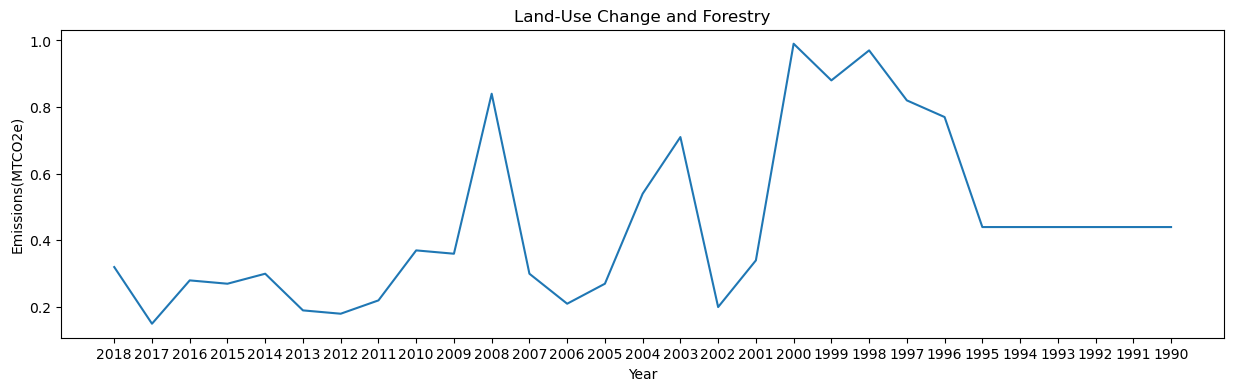

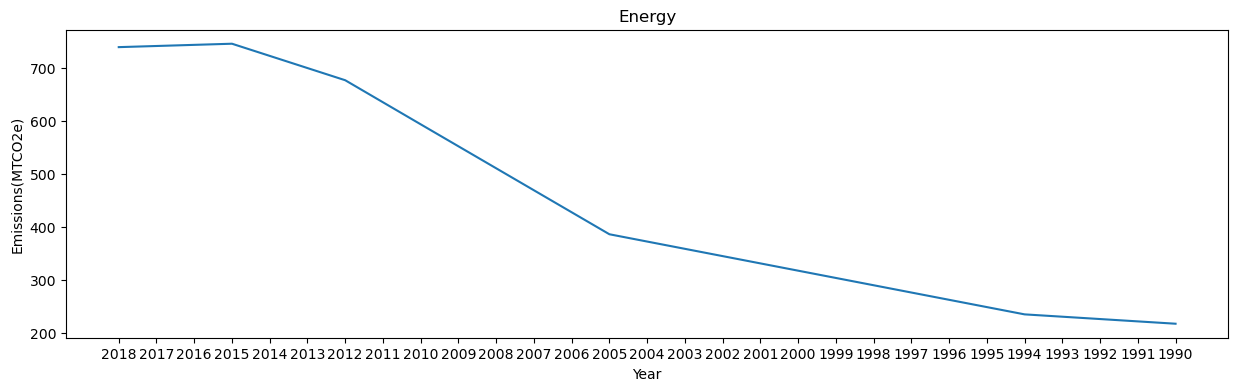

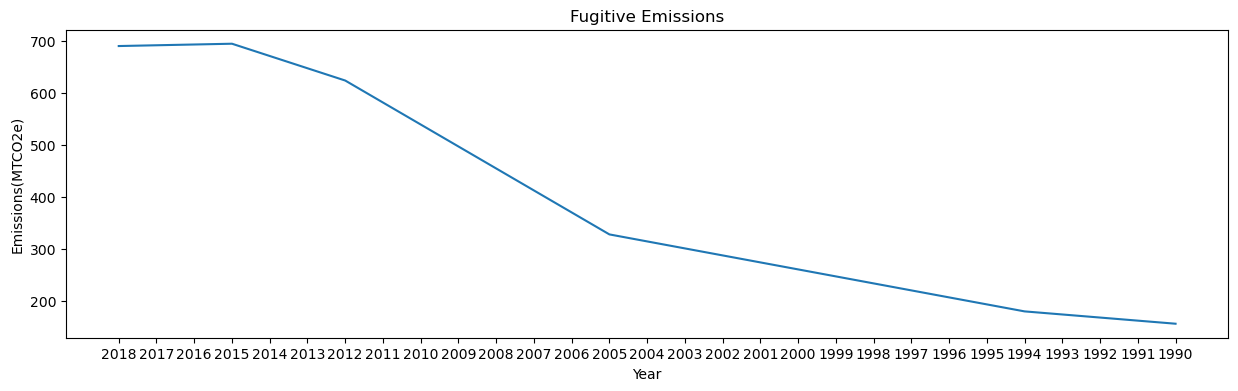

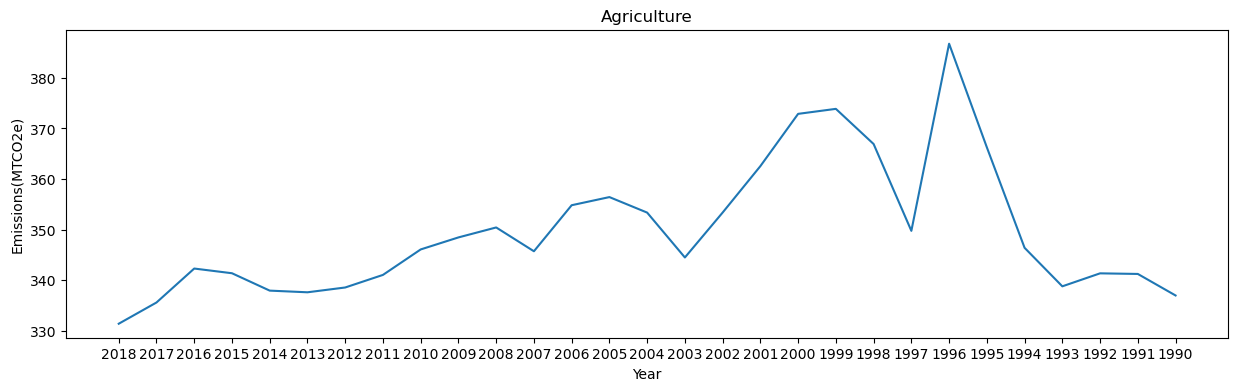

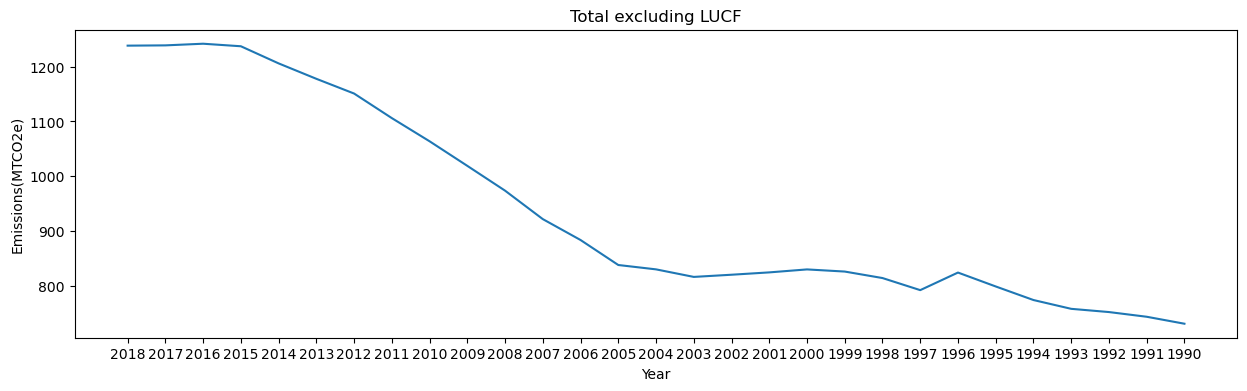

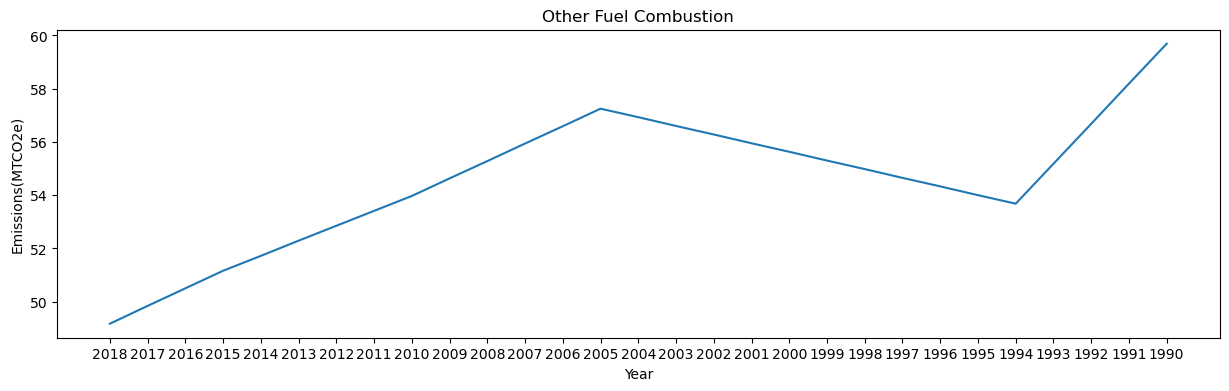

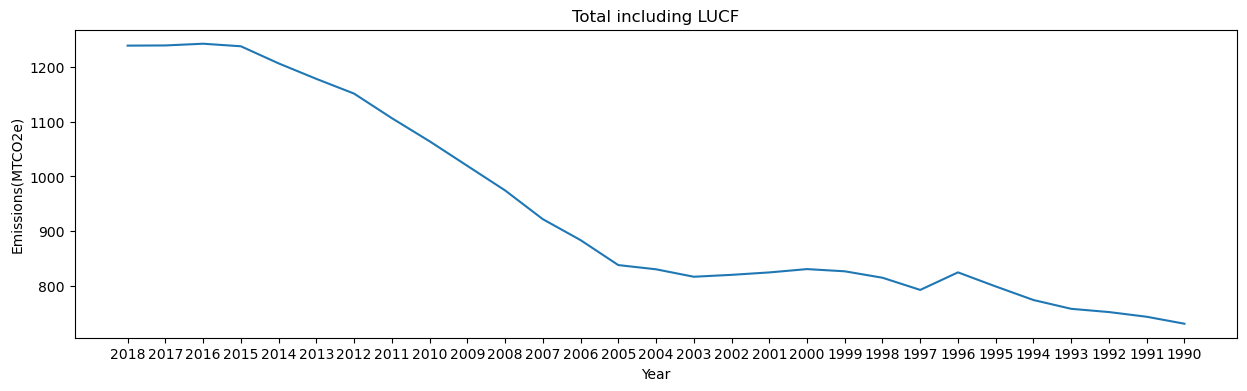

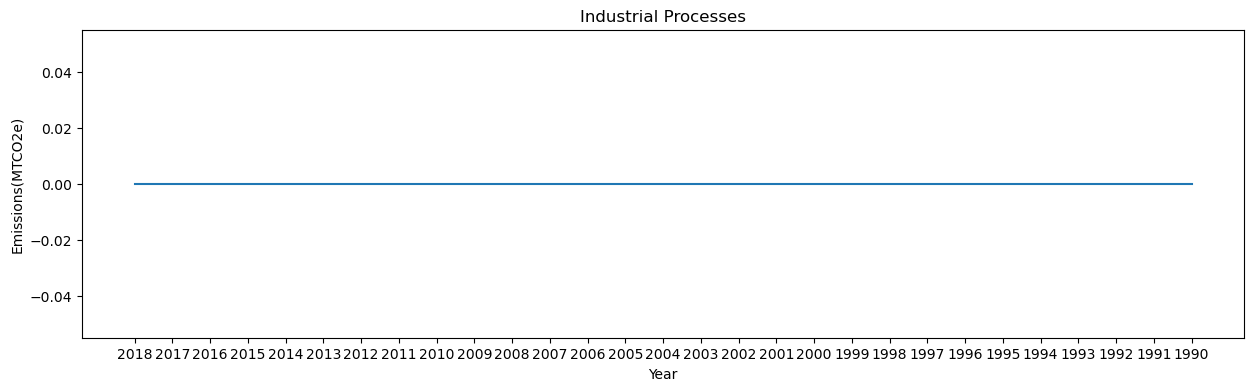

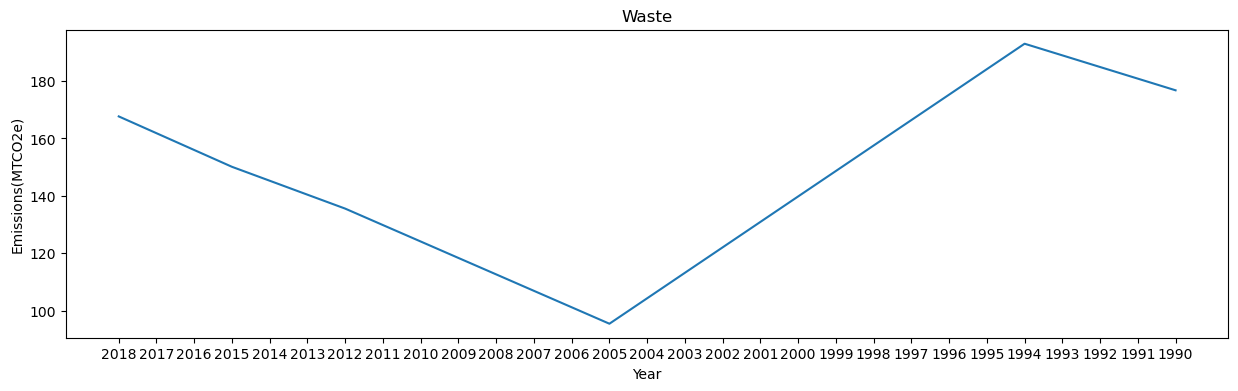

In [141]:
for n in col_china:
    plt.figure(figsize=(15,4))
    sns.lineplot(x=df_china['index'][4:],y=df_china[n][4:])
    plt.xlabel('Year')
    plt.ylabel('Emissions(MTCO2e)')
    plt.title(df_china[n][1])
    warnings.filterwarnings('ignore')
    plt.show()

## 2. Russia

In [111]:
df_russia = df[df['Country']=='Russia'].T.reset_index()

In [112]:
df_russia

,index,1276,1277,1278,1279,1280,1281,1282,1283,1284
0,Country,Russia,Russia,Russia,Russia,Russia,Russia,Russia,Russia,Russia
1,Sector,Energy,Total excluding LUCF,Land-Use Change and Forestry,Fugitive Emissions,Total including LUCF,Agriculture,Industrial Processes,Waste,Other Fuel Combustion
2,Gas,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4
3,Unit,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e
4,2018,683.54,849.57,3.44,680.37,853.0,51.14,0.59,114.3,3.17
5,2017,685.36,850.17,1.95,682.17,852.12,50.66,0.59,113.57,3.19
6,2016,687.18,852.55,3.44,683.97,856.0,51.96,0.59,112.83,3.21
7,2015,671.78,835.56,1.45,668.3,837.01,52.83,0.58,110.38,3.48
8,2014,667.61,830.22,3.37,664.16,833.59,54.35,0.56,107.7,3.44
9,2013,667.58,825.64,1.42,664.17,827.06,53.82,0.58,103.67,3.4


In [113]:
col_russia = df_russia.columns.tolist()
col_russia.pop(0)

[1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284]

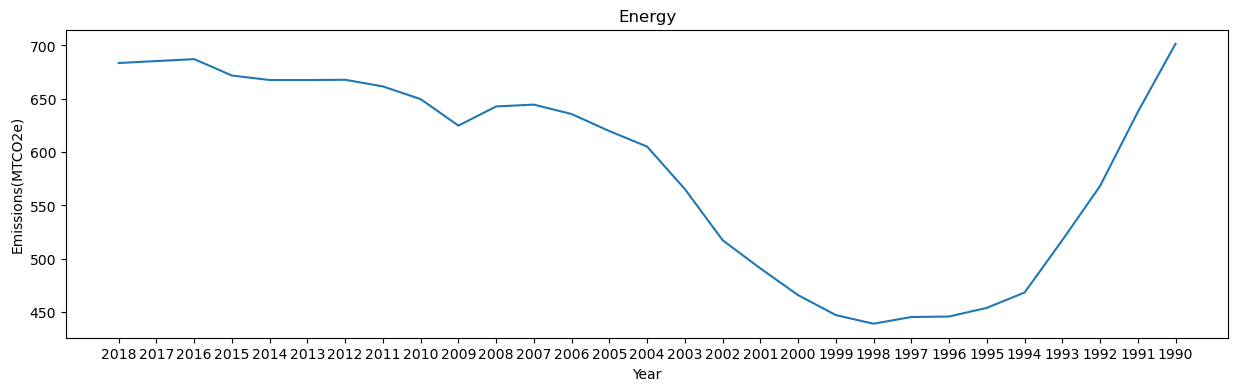

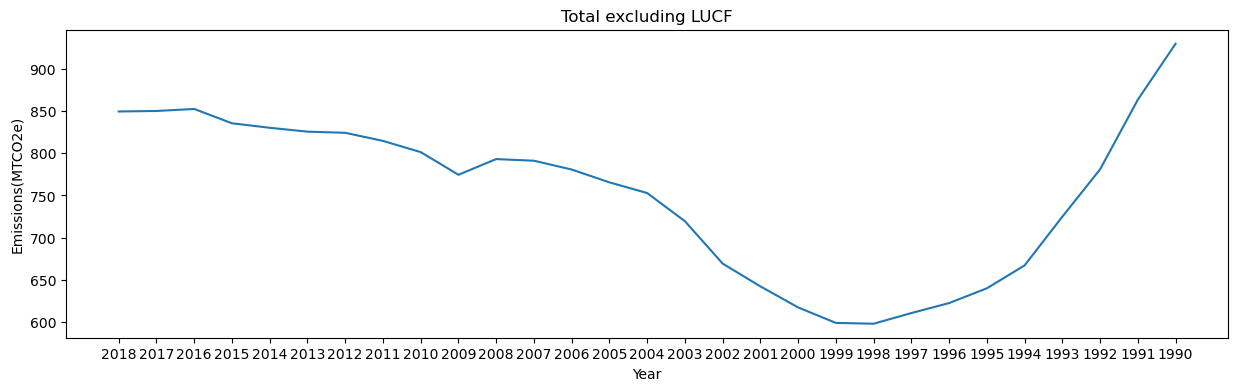

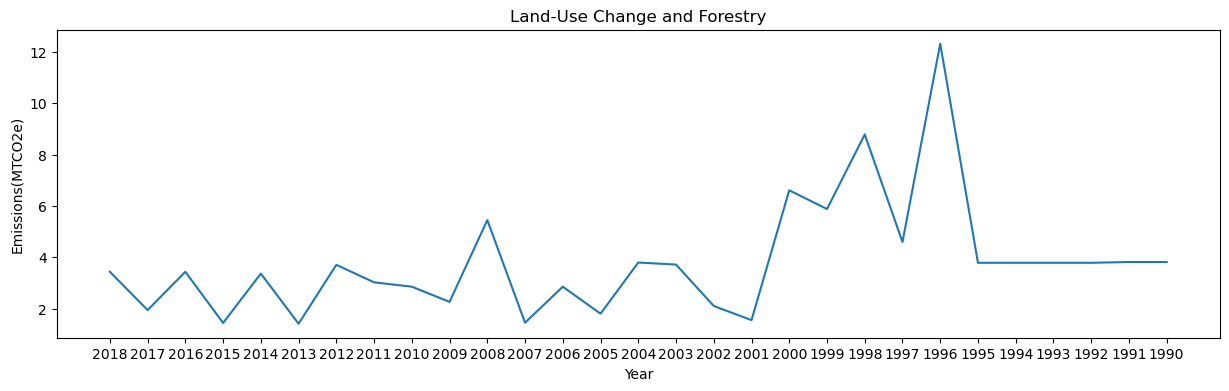

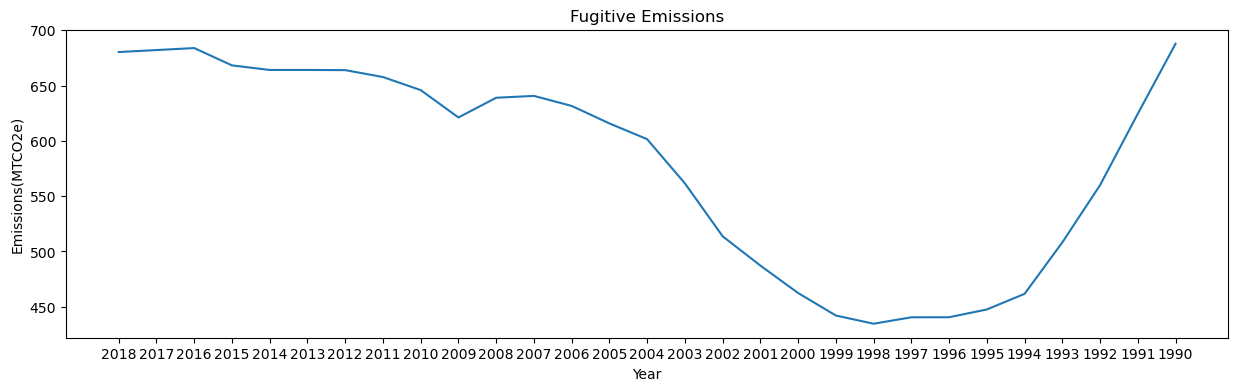

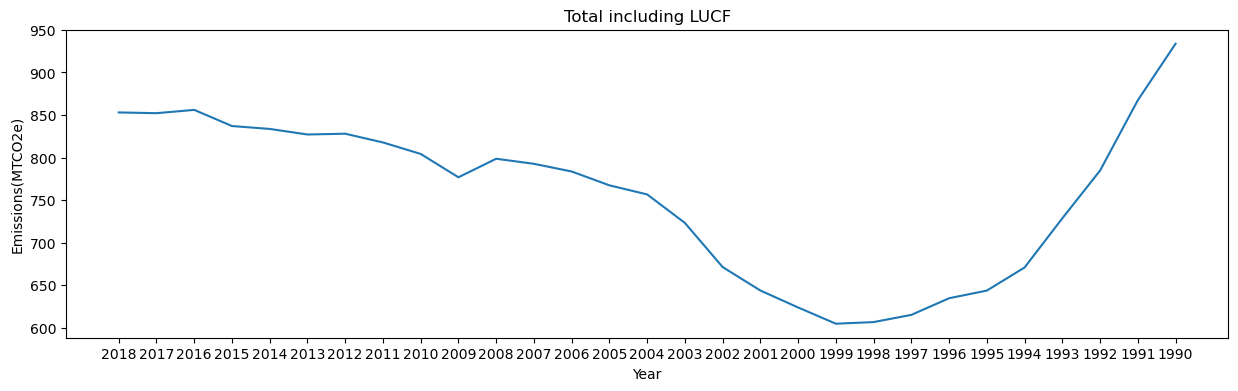

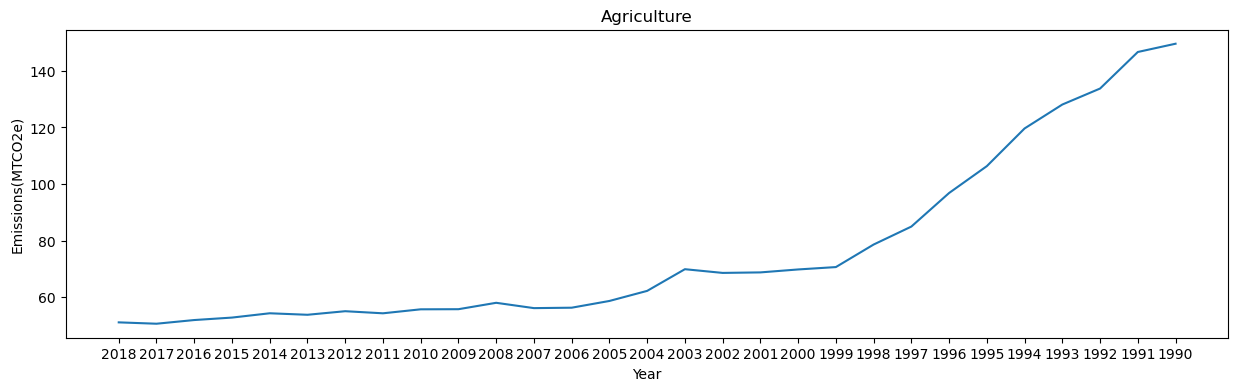

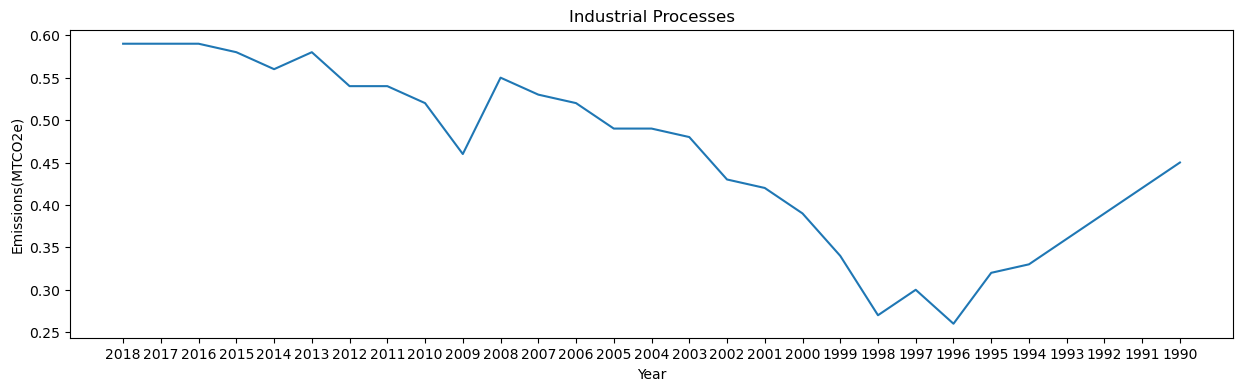

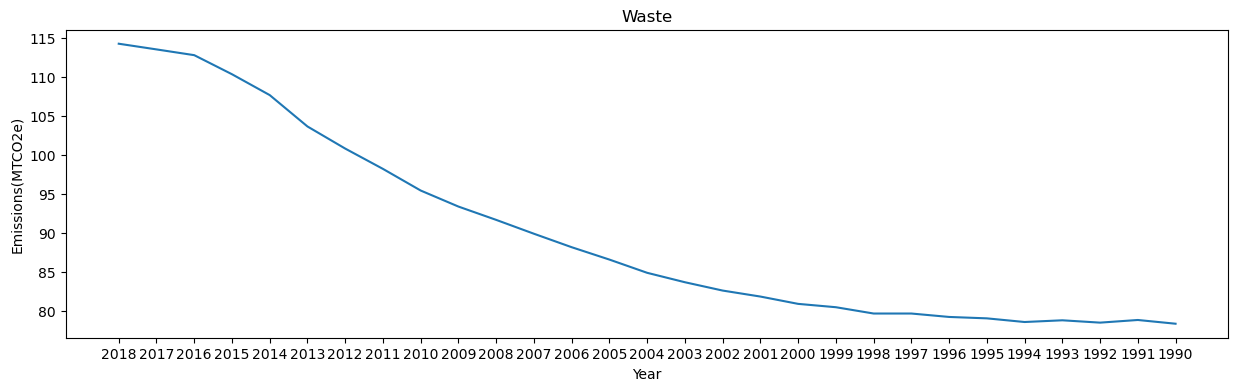

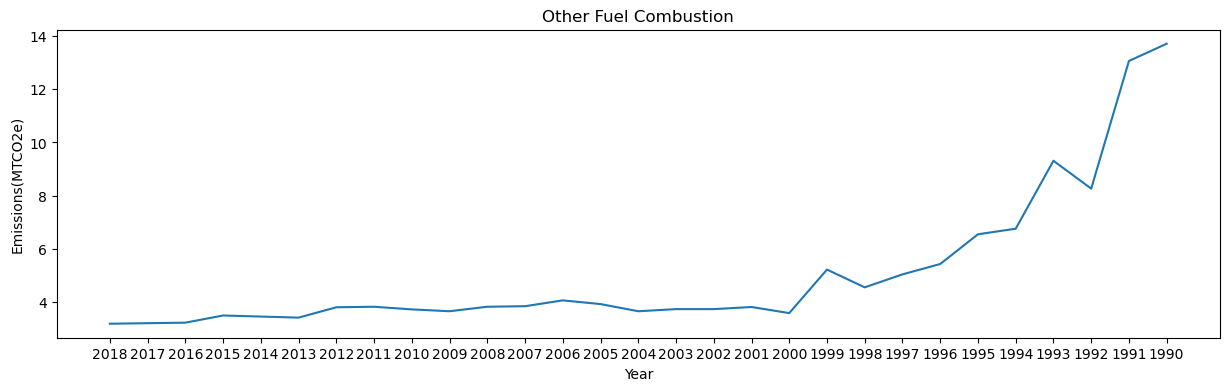

In [142]:
for n in col_russia:
    plt.figure(figsize=(15,4))
    sns.lineplot(x=df_russia['index'][4:],y=df_russia[n][4:])
    plt.xlabel('Year')
    plt.ylabel('Emissions(MTCO2e)')
    plt.title(df_russia[n][1])
    warnings.filterwarnings('ignore')
    plt.show()

## 3. United States

In [115]:
df_us = df[df['Country']=='United States'].T.reset_index()

In [116]:
df_us

,index,1654,1655,1656,1657,1658,1659,1660,1661,1662
0,Country,United States,United States,United States,United States,United States,United States,United States,United States,United States
1,Sector,Energy,Fugitive Emissions,Agriculture,Other Fuel Combustion,Waste,Total excluding LUCF,Total including LUCF,Land-Use Change and Forestry,Industrial Processes
2,Gas,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4
3,Unit,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e
4,2018,293.6,282.62,202.19,10.98,126.52,622.59,623.77,1.18,0.28
5,2017,289.99,279.01,198.78,10.98,125.45,614.5,615.77,1.28,0.28
6,2016,286.37,275.39,198.17,10.98,124.38,609.2,609.89,0.69,0.28
7,2015,296.52,284.78,191.76,11.74,128.67,617.17,618.27,1.1,0.21
8,2014,299.63,286.48,191.45,13.15,129.56,620.81,621.45,0.64,0.16
9,2013,297.31,283.86,190.92,13.45,130.06,618.41,619.02,0.62,0.11


In [128]:
col_us = df_us.columns.tolist()
col_us.pop(0)

'index'

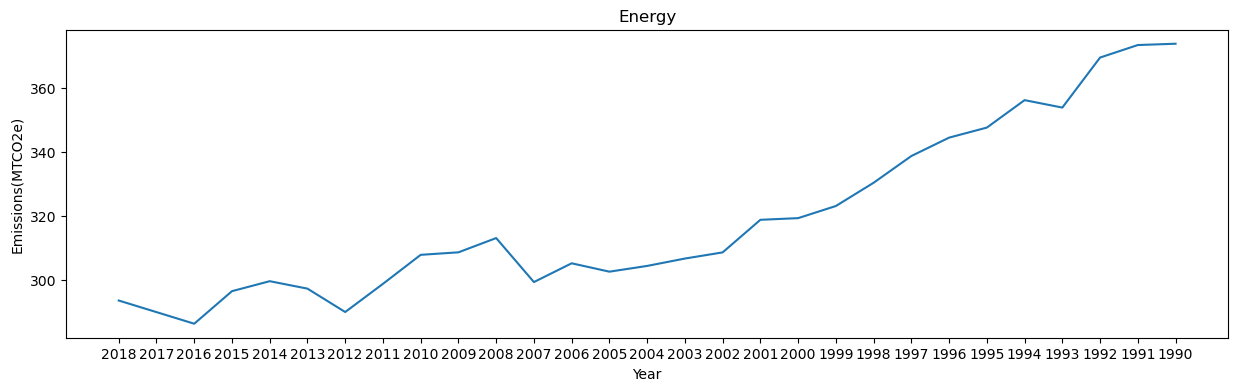

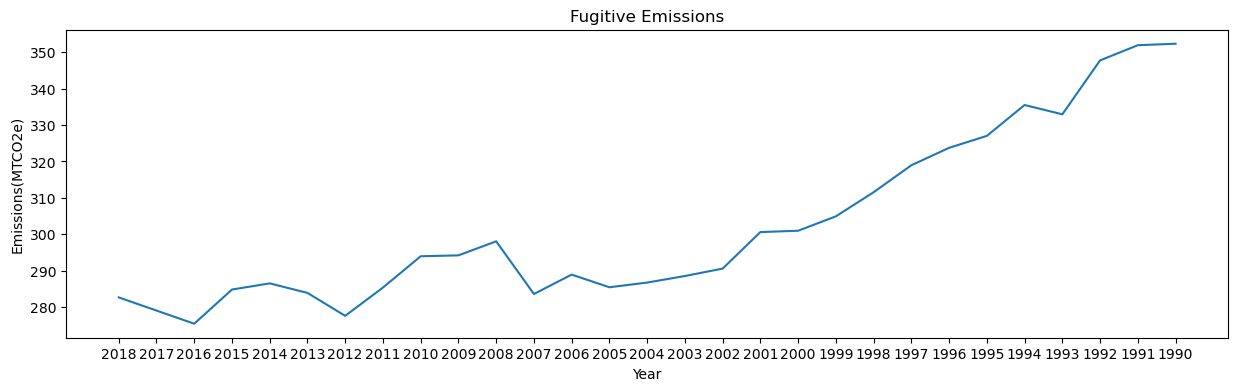

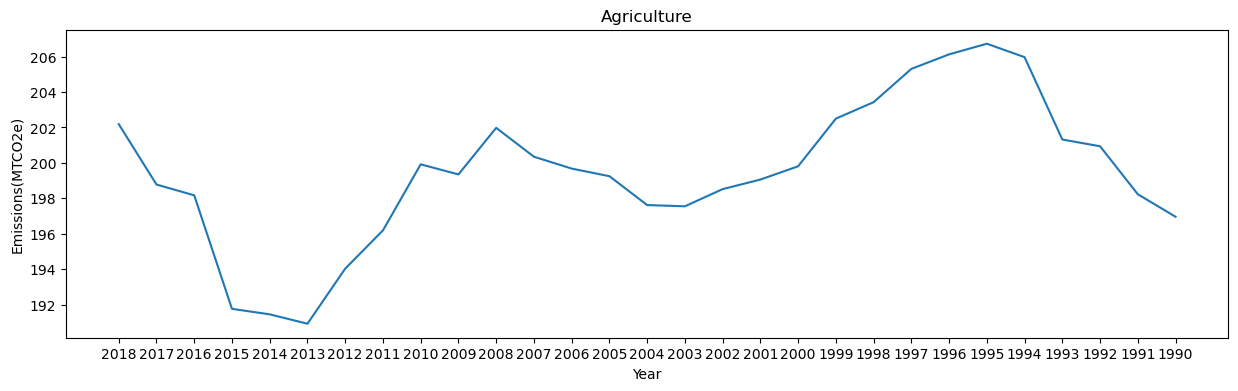

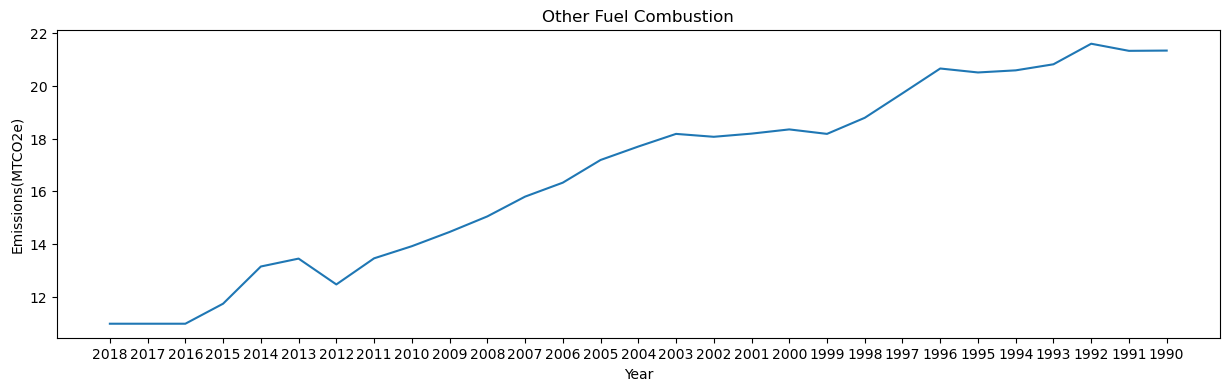

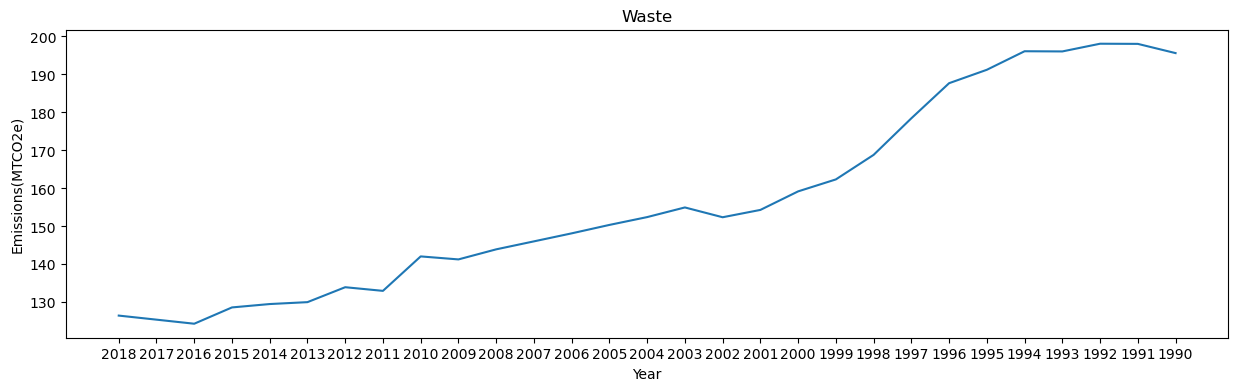

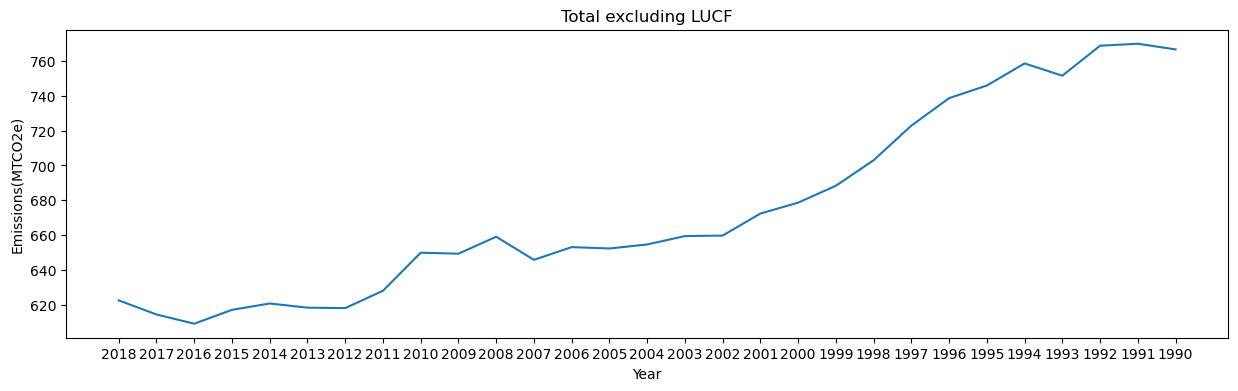

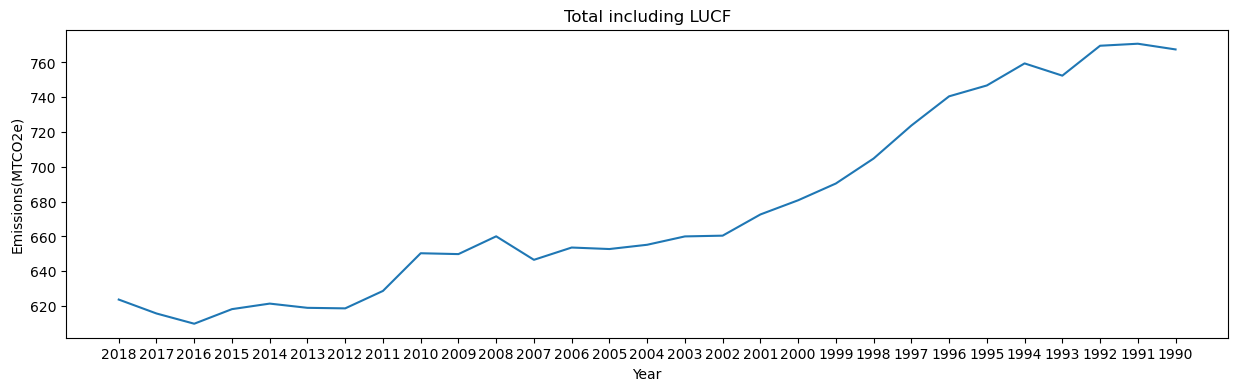

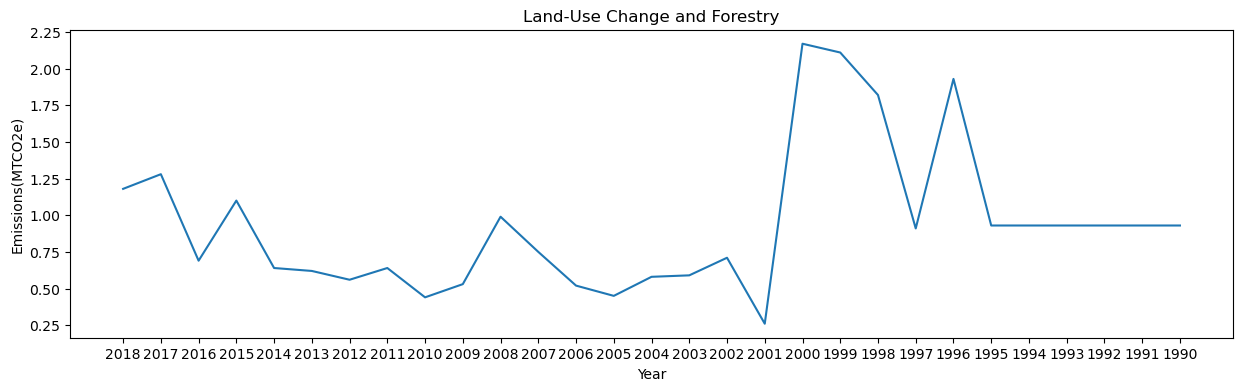

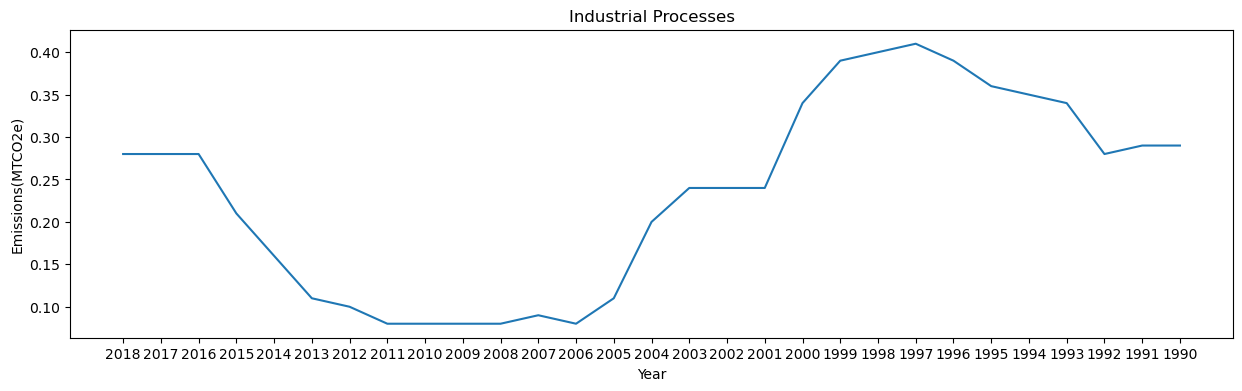

In [143]:
for n in col_us:
    plt.figure(figsize=(15,4))
    sns.lineplot(x=df_us['index'][4:],y=df_us[n][4:])
    plt.xlabel('Year')
    plt.ylabel('Emissions(MTCO2e)')
    plt.title(df_us[n][1])
    warnings.filterwarnings('ignore')
    plt.show()

## 4. India

In [119]:
df_india = df[df['Country']=='India'].T.reset_index()

In [120]:
df_india

,index,688,689,690,691,692,693,694,695,696
0,Country,India,India,India,India,India,India,India,India,India
1,Sector,Agriculture,Total including LUCF,Waste,Fugitive Emissions,Industrial Processes,Other Fuel Combustion,Energy,Total excluding LUCF,Land-Use Change and Forestry
2,Gas,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4
3,Unit,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e
4,2018,498.49,669.34,68.81,52.97,0.13,46.11,99.08,666.51,2.83
5,2017,494.26,665.04,67.88,53.22,0.13,46.11,99.34,661.61,3.43
6,2016,491.01,659.81,66.96,53.47,0.13,46.12,99.59,657.69,2.11
7,2015,485.98,653.61,66.03,53.73,0.13,46.13,99.85,652.0,1.61
8,2014,487.66,655.78,65.09,54.63,0.13,46.16,100.79,653.67,2.1
9,2013,487.51,656.08,64.15,55.53,0.13,46.2,101.73,653.53,2.55


In [132]:
col_india = df_india.columns.to_list()
col_india.pop(0)

'index'

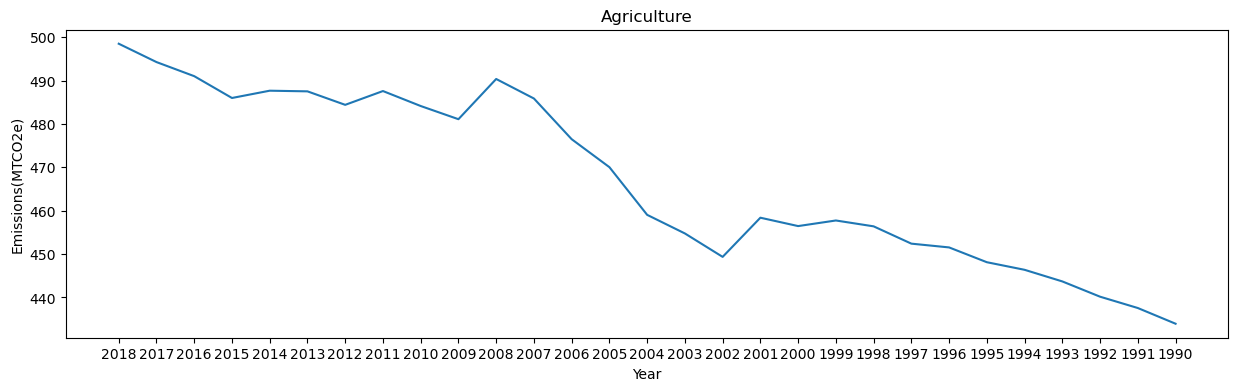

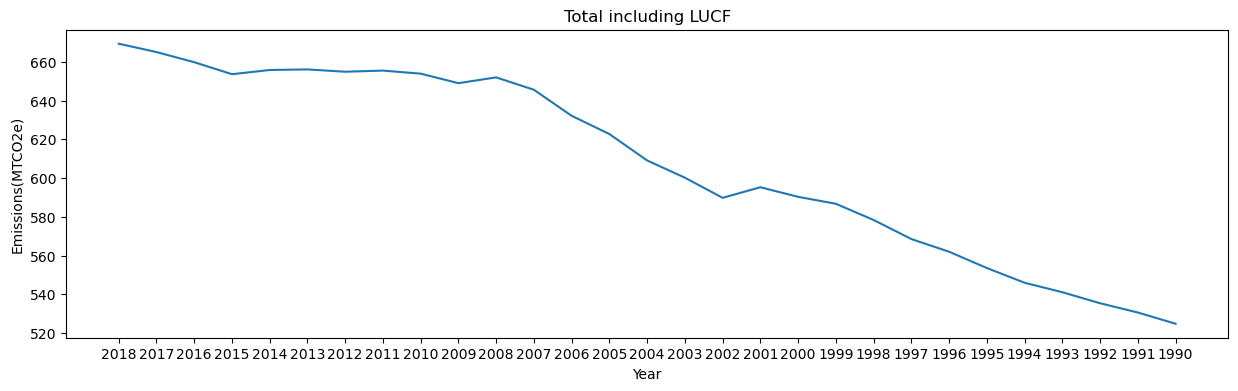

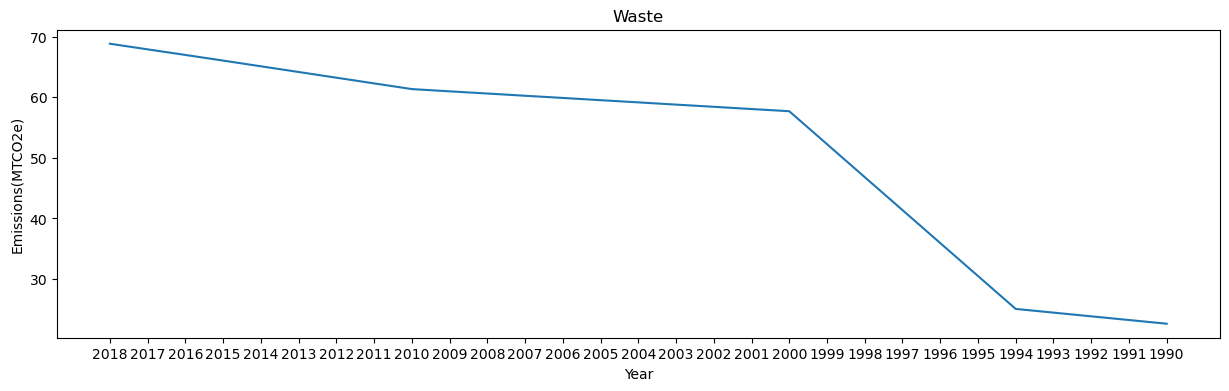

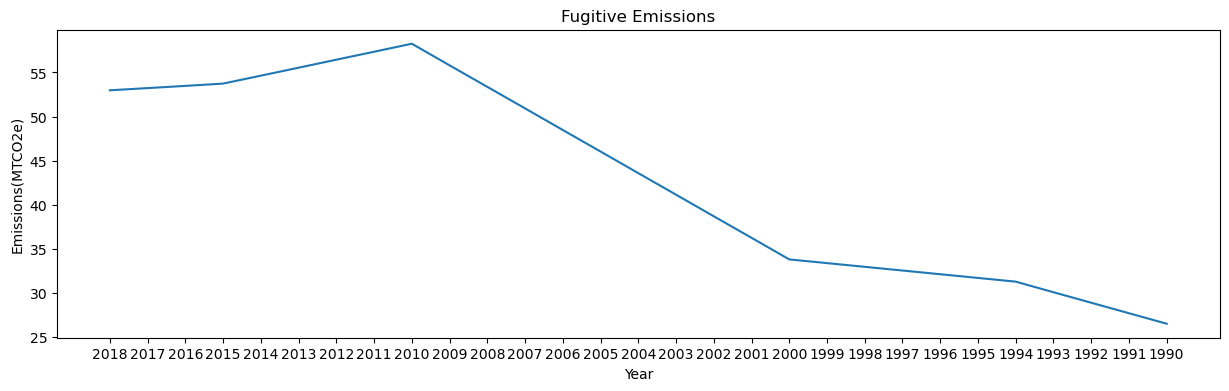

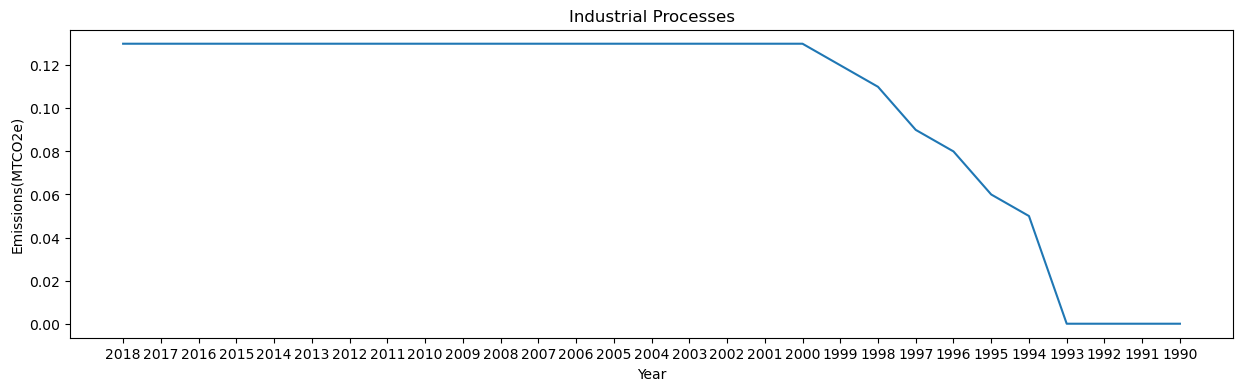

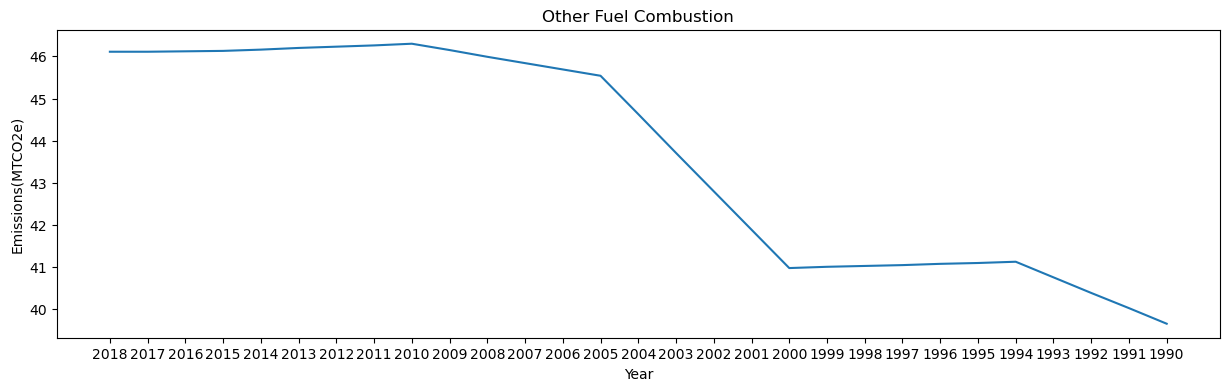

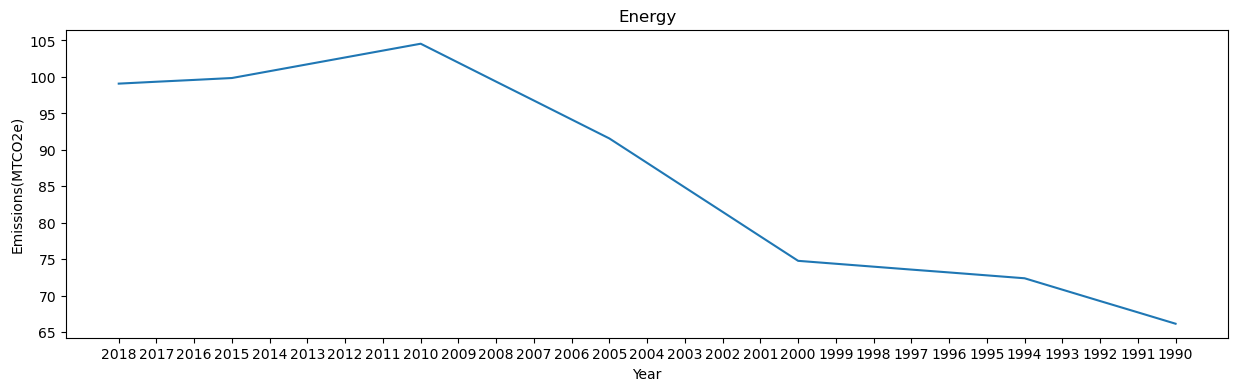

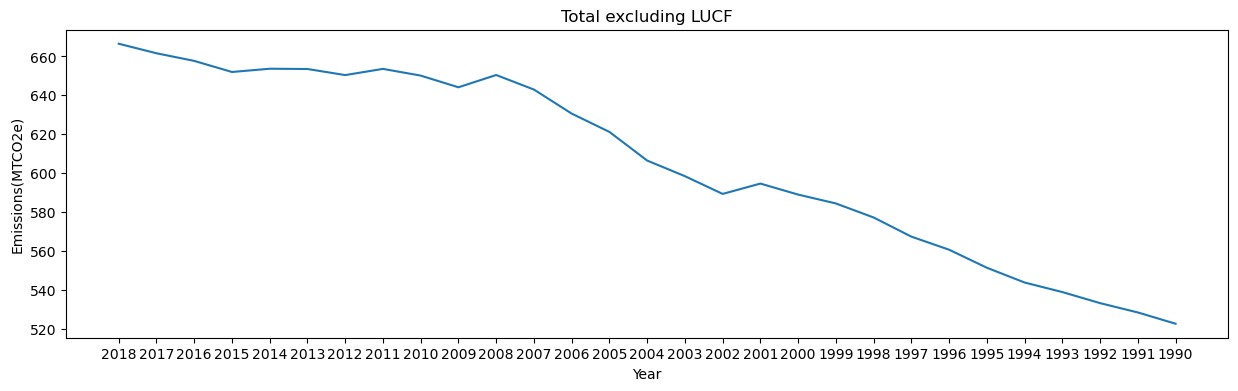

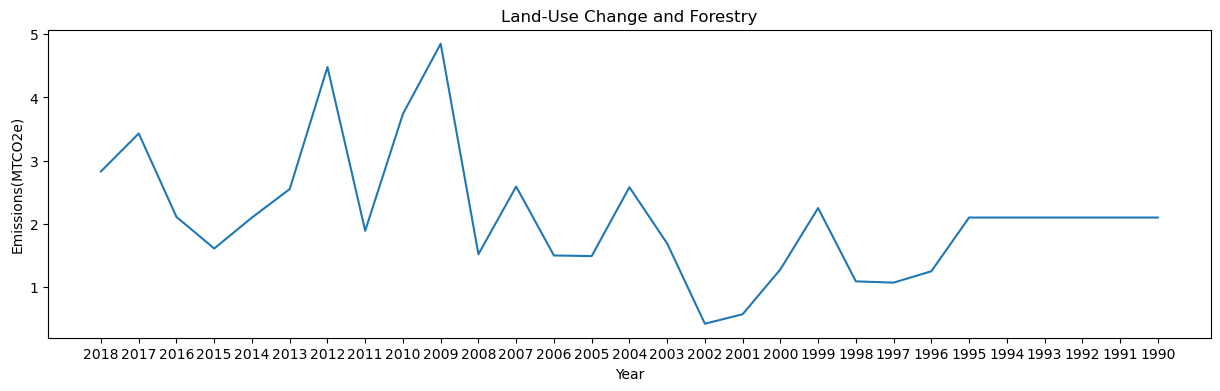

In [144]:
for n in col_india:
    plt.figure(figsize=(15,4))
    sns.lineplot(x=df_india['index'][4:],y=df_india[n][4:])
    plt.xlabel('Year')
    plt.ylabel('Emissions(MTCO2e)')
    plt.title(df_india[n][1])
    warnings.filterwarnings('ignore')
    plt.show()

## 5. Brazil

In [134]:
df_brazil = df[df['Country']=='Brazil'].T.reset_index()

In [135]:
df_brazil

,index,207,208,209,210,211,212,213,214,215
0,Country,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil
1,Sector,Agriculture,Total excluding LUCF,Total including LUCF,Land-Use Change and Forestry,Industrial Processes,Energy,Other Fuel Combustion,Waste,Fugitive Emissions
2,Gas,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4,CH4
3,Unit,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e,MTCO2e
4,2018,329.92,416.28,418.02,1.74,0.23,18.26,12.17,67.87,6.09
5,2017,335.96,421.66,427.51,5.85,0.23,18.26,12.29,67.22,5.97
6,2016,339.75,424.8,428.63,3.83,0.23,18.25,12.41,66.57,5.85
7,2015,337.89,422.28,426.88,4.6,0.23,18.25,12.52,65.92,5.72
8,2014,333.33,416.35,418.7,2.35,0.23,17.74,12.26,65.05,5.48
9,2013,330.24,411.88,412.93,1.05,0.23,17.24,12.0,64.18,5.24


In [137]:
col_brazil = df_brazil.columns.to_list()
col_brazil.pop(0)

'index'

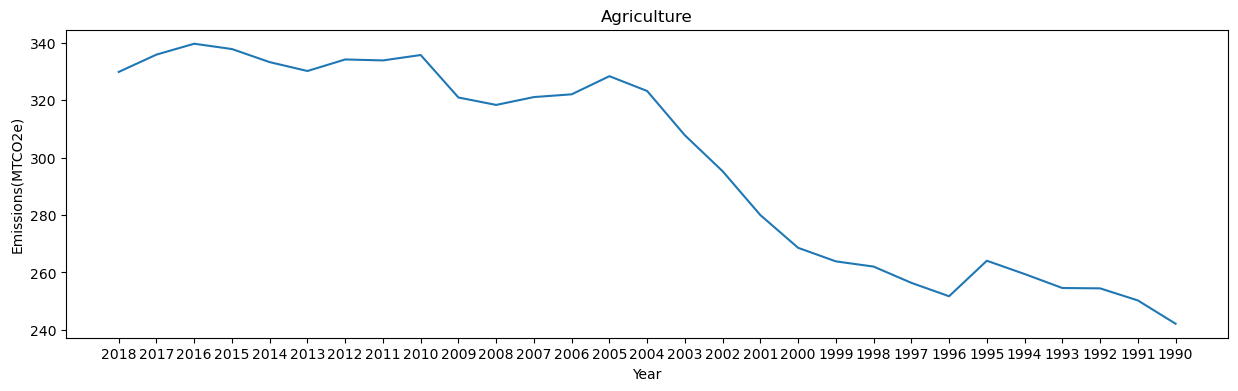

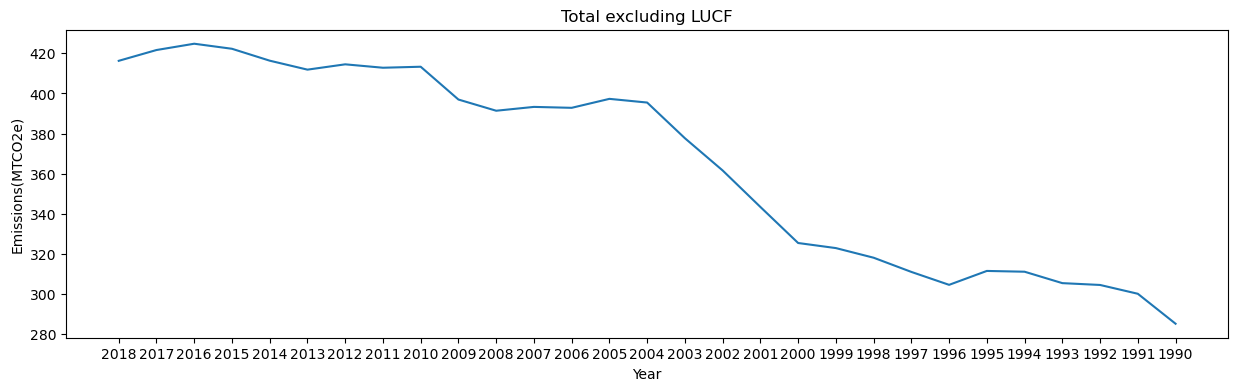

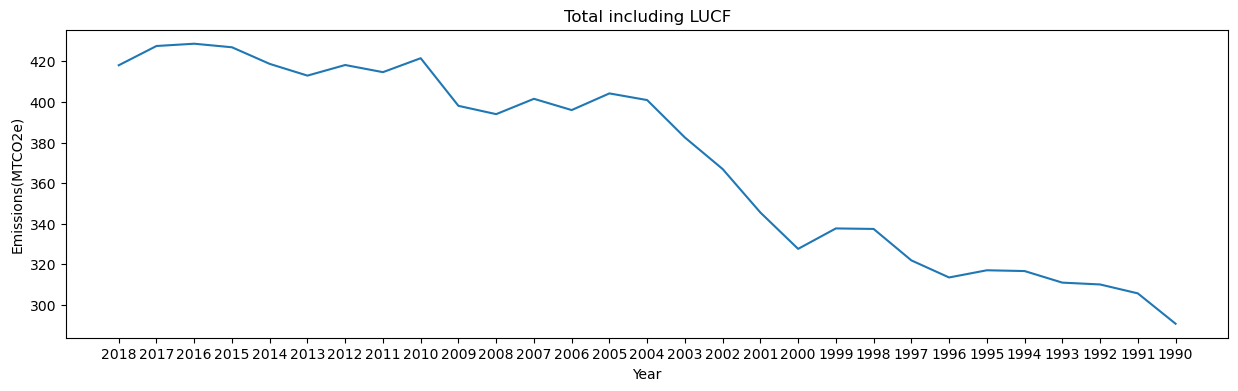

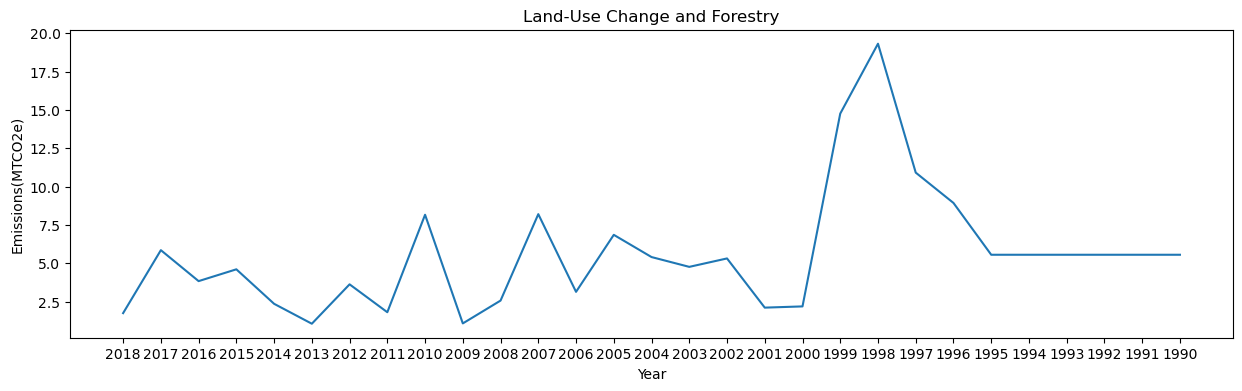

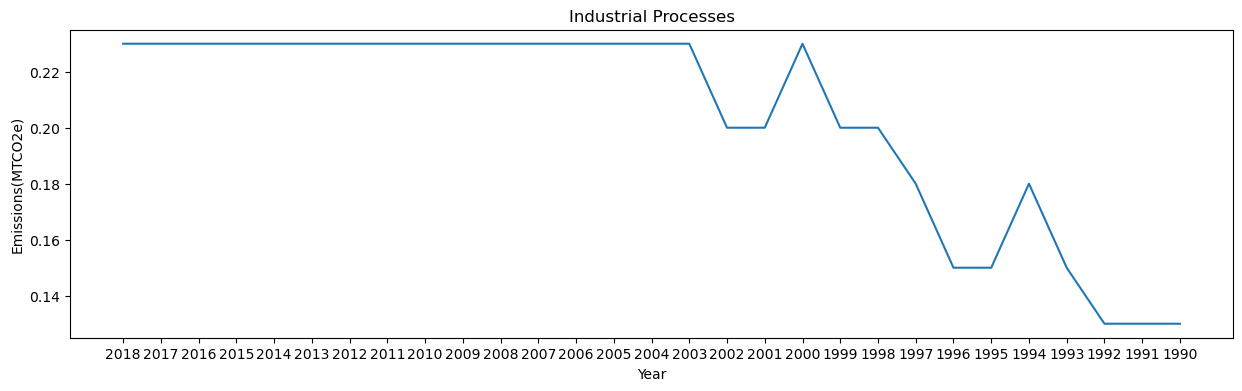

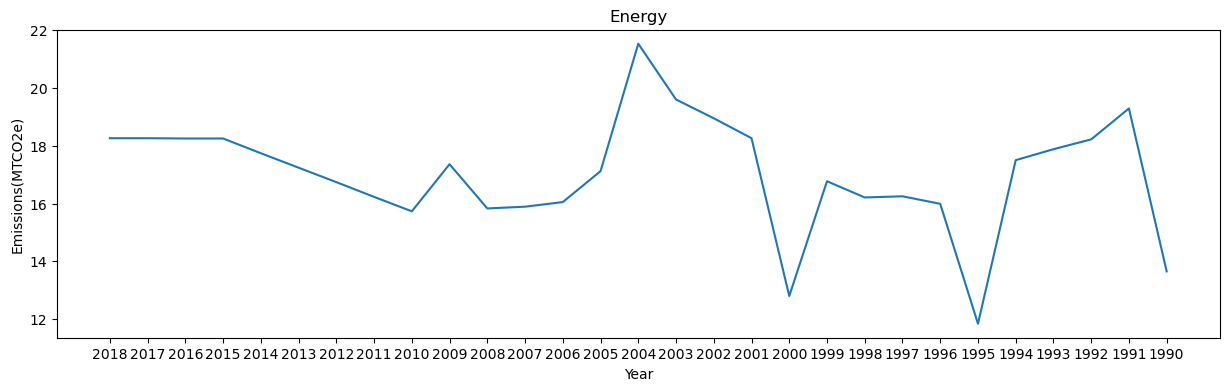

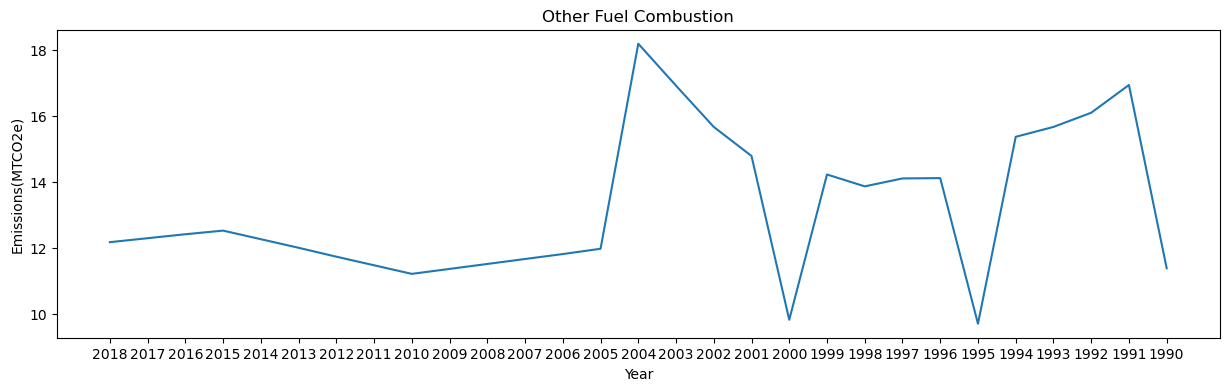

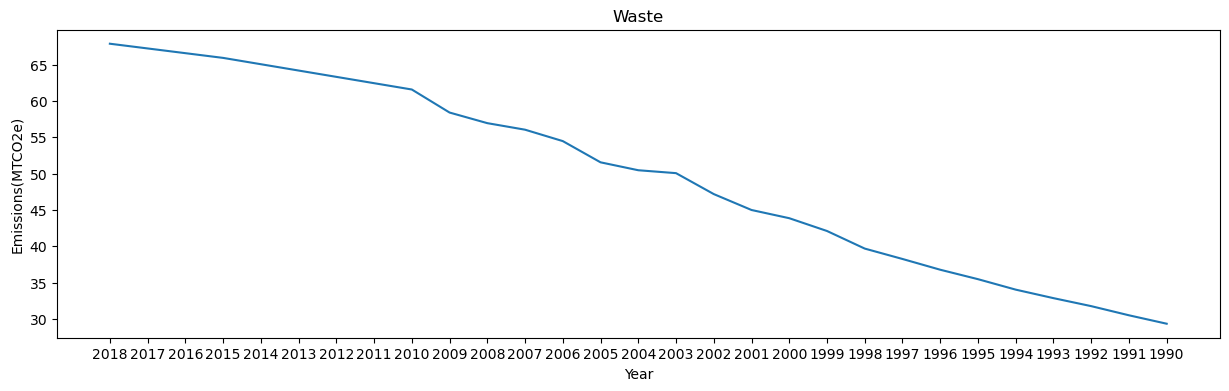

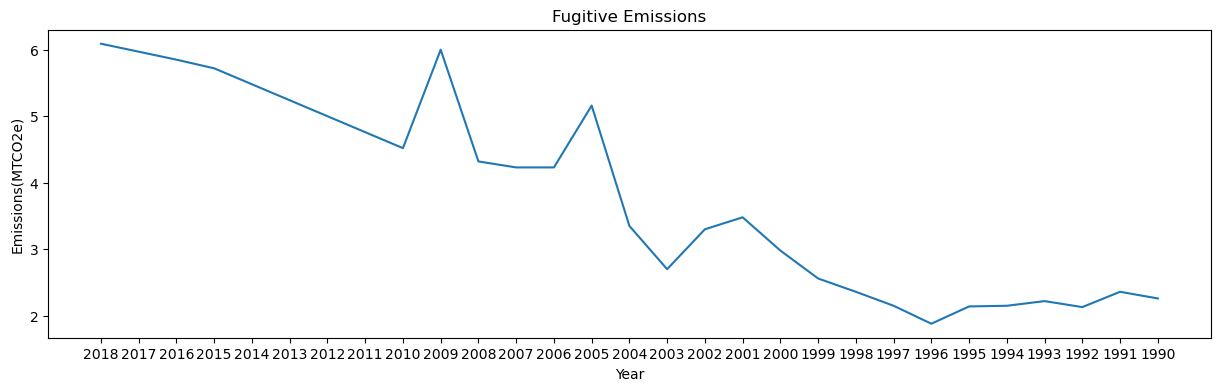

In [147]:
for n in col_brazil:
    plt.figure(figsize=(15,4))
    sns.lineplot(x=df_brazil['index'][4:],y=df_brazil[n][4:])
    plt.xlabel('Year')
    plt.ylabel('Emissions(MTCO2e)')
    plt.title(df_brazil[n][1])
    warnings.filterwarnings('ignore')
    plt.show()